In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
toyota = pd.read_csv("D:\ExcelR\Assigments\Multi_Linear_Regression\ToyotaCorolla.csv")
toyota.head(1)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0


Data preprocessing

In [3]:
corolla = toyota[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
corolla.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [4]:
corolla.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [5]:
corolla.dtypes

Price            int64
Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

In [6]:
corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [7]:
x=corolla.drop(labels='Price',axis=1)
y=corolla['Price']

In [8]:
from sklearn.preprocessing import StandardScaler
stdscaler_model = StandardScaler().fit_transform(x)

In [9]:
scaled_model = pd.DataFrame(stdscaler_model,columns=("Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"))
scaled_model['Price']=y
scaled_model

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,-1.771966,-0.574695,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561,13500
1,-1.771966,0.117454,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561,13750
2,-1.718184,-0.715386,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561,13950
3,-1.610620,-0.547650,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.758561,14950
4,-1.395491,-0.801028,-0.768042,0.997419,-1.085139,-0.140425,2.988680,1.853577,13750
...,...,...,...,...,...,...,...,...,...
1431,0.702015,-1.279939,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-0.901883,7500
1432,0.863362,-1.321120,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915,10845
1433,0.809579,-1.374036,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915,8500
1434,0.755797,-1.376703,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915,7250


In [10]:
scaled_model.std()

Age_08_04           1.000348
KM                  1.000348
HP                  1.000348
cc                  1.000348
Doors               1.000348
Gears               1.000348
Quarterly_Tax       1.000348
Weight              1.000348
Price            3626.964585
dtype: float64

In [11]:
x_scaled = scaled_model.drop(labels='Price',axis=1)
y_scaled = scaled_model['Price']

model building

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_scaled,test_size=0.2)

In [13]:
x_train.shape

(1148, 8)

In [14]:
x_test.shape

(288, 8)

In [15]:
y_train.shape

(1148,)

In [16]:
y_test.shape

(288,)

Assumptions check

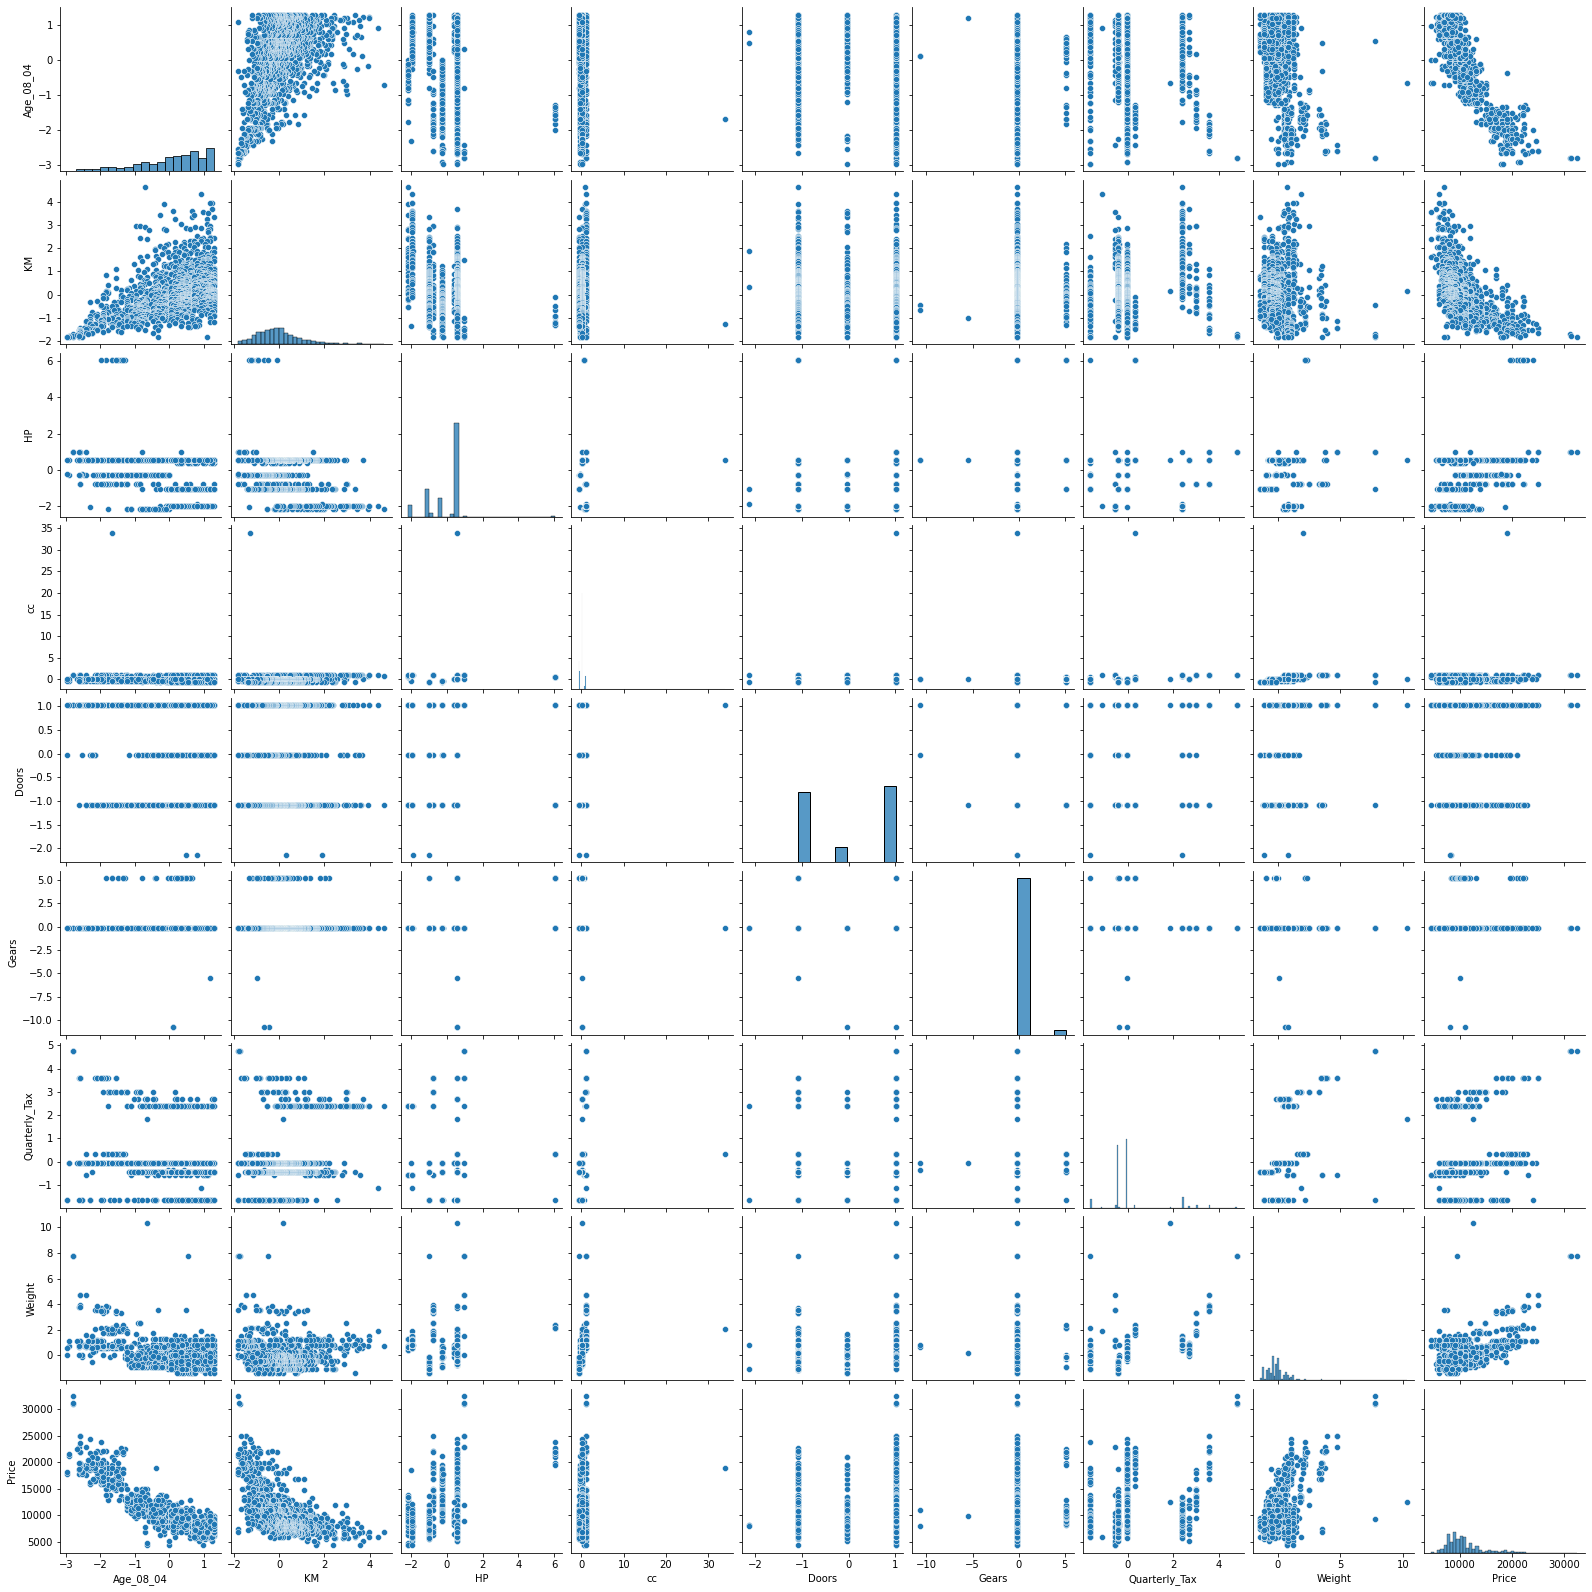

In [17]:
sns.pairplot(scaled_model)

In [18]:
scaled_model.corr()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
Age_08_04,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253,-0.876590
KM,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598,-0.569960
HP,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614,0.314990
cc,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637,0.126389
Doors,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618,0.185326
Gears,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613,0.063104
Quarterly_Tax,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134,0.219197
Weight,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000,0.581198
Price,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198,1.000000


<AxesSubplot:>

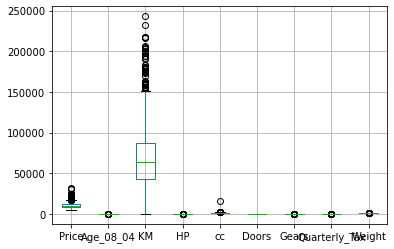

In [19]:
corolla.boxplot()

In [20]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Age_08_04', ylabel='Density'>

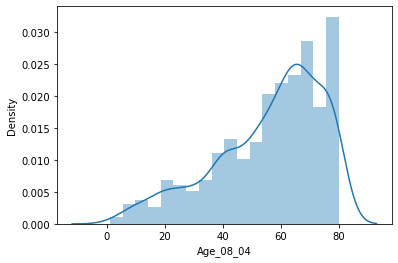

In [21]:
sns.distplot(corolla['Age_08_04'])

model training

In [22]:
linear_model = LinearRegression()

In [23]:
linear_model.fit(x_scaled,y_scaled)

LinearRegression()

In [24]:
y_pred_train = linear_model.predict(x_train)
y_pred_test = linear_model.predict(x_test)

In [25]:
from sklearn.metrics import r2_score
print('R2 score for train data:',r2_score(y_train,y_pred_train))
print('R2score for test data:',r2_score(y_test,y_pred_test))      

R2 score for train data: 0.8627855875886051
R2score for test data: 0.8673193279788475


Model optimization 

In [26]:
import statsmodels.formula.api as smf

In [27]:
model1 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=scaled_model).fit()

In [28]:
print('aic is :',model1.aic)
print('rsquared value is :',model1.rsquared)
print('p value is:')
print(model1.pvalues)

aic is : 24769.07664007625
rsquared value is : 0.8637627463428192
p value is:
Intercept         0.000000e+00
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [29]:
methods = (('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight'),
           ('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax'),
          ('Price~Age_08_04+KM+HP+cc+Doors+Gears+Weight'),
          ('Price~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight'),
          ('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight'),
          ('Price~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight'),
          ('Price~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight'),
          ('Price~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight'),
          ('Price~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight'),
          ('Price~Age_08_04'),('Price~KM'),('Price~HP'),('Price~cc'),
           ('Price~Doors'),('Price~Gears'),('Price~Quarterly_Tax'),('Price~Weight'))

In [30]:
for model in methods:
    models=smf.ols(model,data=scaled_model).fit()
    print(model)
    params=models.params
    print(params)
    pvalue=models.pvalues
    pvalue_data=pvalue.to_frame()
    pvalue_data.reset_index(inplace=True)
    pvalue_data.rename({'index':'features'},axis=1)
    print('')
    print('pvalue is:')
    print(pvalue_data)
    for i in range(len(pvalue_data)):
        if i!=0:
            if pvalue_data.iloc[i,1]>0.05:
                print('')
                print('{} is an insignificant feature, since pvalue {} is greater than 0.05'
                  .format(pvalue_data.iloc[i,0],pvalue_data.iloc[i,1]))
    print('')
    print('aic value is: ',models.aic)
    print('rsqaure value is: ',models.rsquared)
    print('......................................................................................................')


Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight
Intercept        10730.824513
Age_08_04        -2262.056818
KM                -780.504686
HP                 474.448890
cc                 -51.375468
Doors               -1.539600
Gears              111.996499
Quarterly_Tax      162.363645
Weight             892.410492
dtype: float64

pvalue is:
           index              0
0      Intercept   0.000000e+00
1      Age_08_04  3.354724e-288
2             KM   7.538439e-57
3             HP   3.757218e-28
4             cc   1.790902e-01
5          Doors   9.677716e-01
6          Gears   2.606549e-03
7  Quarterly_Tax   2.619148e-03
8         Weight   2.048576e-52

cc is an insignificant feature, since pvalue 0.17909018530675758 is greater than 0.05

Doors is an insignificant feature, since pvalue 0.9677716127461561 is greater than 0.05

aic value is:  24769.07664007625
rsqaure value is:  0.8637627463428192
.............................................................................


pvalue is:
       index         0
0  Intercept  0.000000
1         cc  0.000002

aic value is:  27594.41368349079
rsqaure value is:  0.01597422921332259
......................................................................................................
Price~Doors
Intercept    10730.824513
Doors          671.935123
dtype: float64

pvalue is:
       index             0
0  Intercept  0.000000e+00
1      Doors  1.461237e-12

aic value is:  27567.35077249662
rsqaure value is:  0.03434555943109807
......................................................................................................
Price~Gears
Intercept    10730.824513
Gears          228.795749
dtype: float64

pvalue is:
       index         0
0  Intercept  0.000000
1      Gears  0.016775

aic value is:  27611.808161153953
rsqaure value is:  0.003982096785360323
......................................................................................................
Price~Quarterly_Tax
Intercept        10730.824513
Quarter

Inference

The above result shows that when the model built separately by taking individual features, they contribute more toward the result

In most of the cases, insignificant/ non-important feature is Door, there contribution in model buliding is comparitively very less than other feature fallowed by cc

The model with comparitively less aic value and more r2 value is considered as a best model than other model

The model built by taking all the feature and the one built by dropping Door performes better than other model

calculate vif

In [31]:
rsd_age = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=scaled_model).fit().rsquared
rsd_km = smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=scaled_model).fit().rsquared
rsd_hp = smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=scaled_model).fit().rsquared
rsd_cc = smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=scaled_model).fit().rsquared
rsd_dr = smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=scaled_model).fit().rsquared
rsd_gr = smf.ols('Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=scaled_model).fit().rsquared
rsd_tx = smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=scaled_model).fit().rsquared
rsd_wt = smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=scaled_model).fit().rsquared

In [32]:
vif_age =1/(1-rsd_age)

In [33]:
vif_km =1/(1-rsd_km)

In [34]:
vif_hp =1/(1-rsd_hp)

In [35]:
vif_cc =1/(1-rsd_cc)

In [36]:
vif_dr =1/(1-rsd_dr)

In [37]:
vif_gr =1/(1-rsd_gr)

In [38]:
vif_tx =1/(1-rsd_tx)

In [39]:
vif_wt =1/(1-rsd_wt)

In [47]:
vif_table = pd.DataFrame({'feature':['Age','KM','HP','cc','Doors','Gears','Quarterly','Weight'],
                                     'vif':[vif_age,vif_km,vif_hp,vif_cc,vif_dr,vif_gr,vif_tx,vif_wt]})
vif_table

,feature,vif
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly,2.311431
7,Weight,2.516420


vif value is between 1-3 moderately correlated

# Residual analysis

## Test for normality of residual(q-q plot)

In [48]:
modelqq = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=scaled_model).fit()

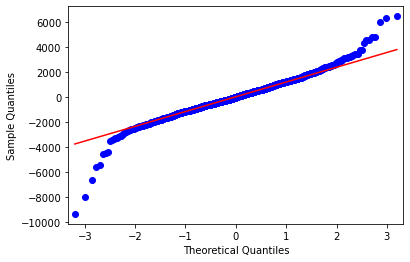

In [51]:
import statsmodels.api as sm
qqplot=sm.qqplot(modelqq.resid,line='q')

The Q-Q plot significes that the data are moderately normally distributed with flat tails

In [54]:
list(np.where(modelqq.resid>5000))

[array([109, 147, 523], dtype=int64)]

In [55]:
list(np.where(modelqq.resid<-6000))

[array([221, 601, 960], dtype=int64)]

## Residual plot for Homoscedacity

In [56]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

Text(0, 0.5, 'standardized residual value')

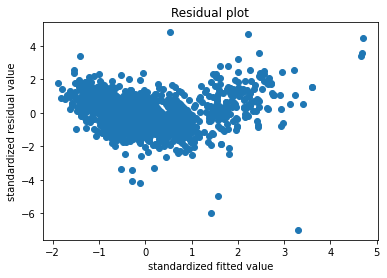

In [58]:
plt.scatter(get_standardized_values(modelqq.fittedvalues),get_standardized_values(modelqq.resid))
plt.title('Residual plot')
plt.xlabel('standardized fitted value')
plt.ylabel('standardized residual value')

Residual vs Regressors

Age_08_04


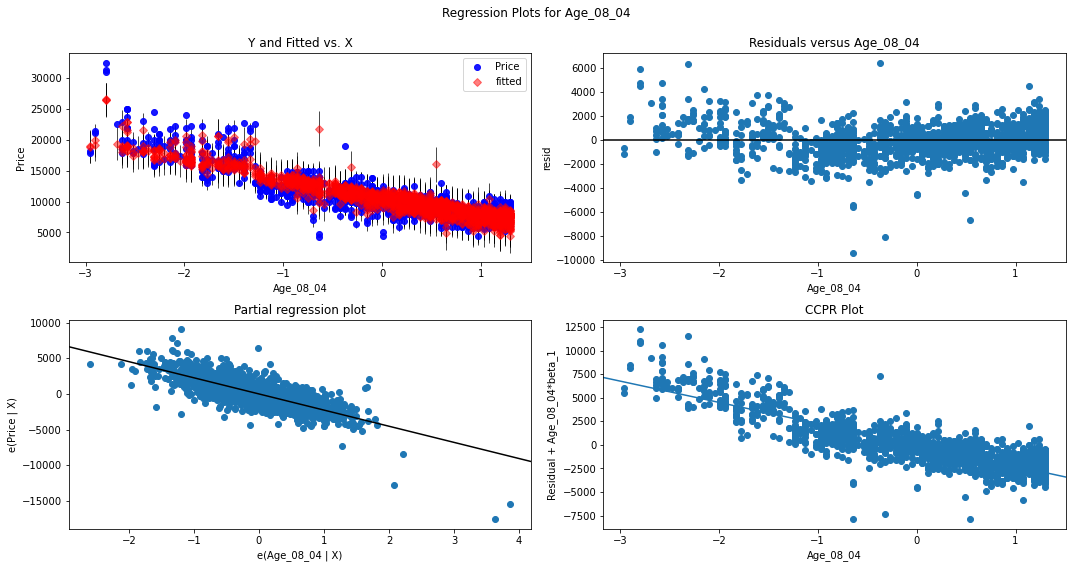

KM


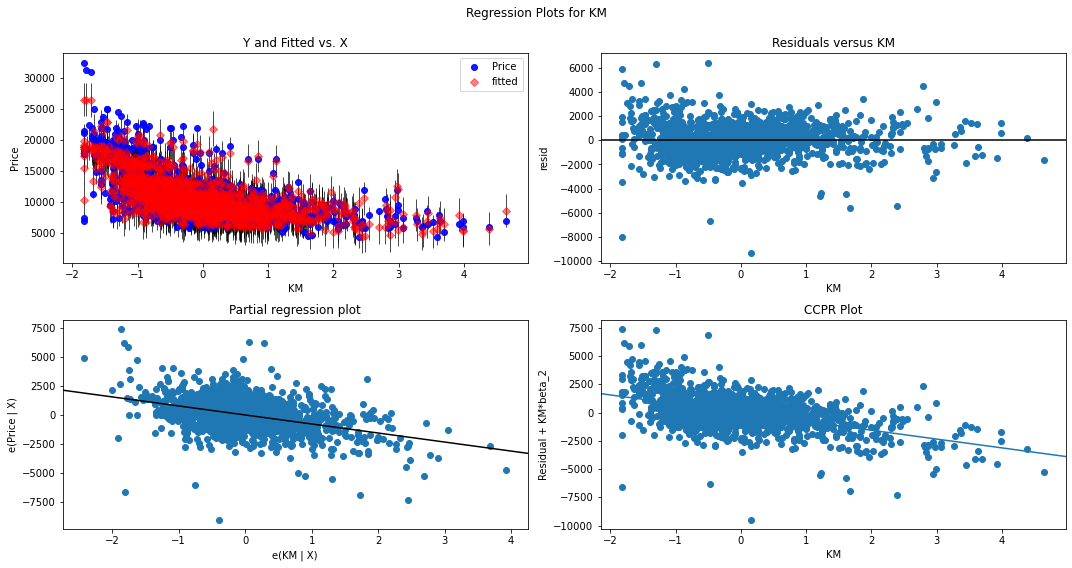

HP


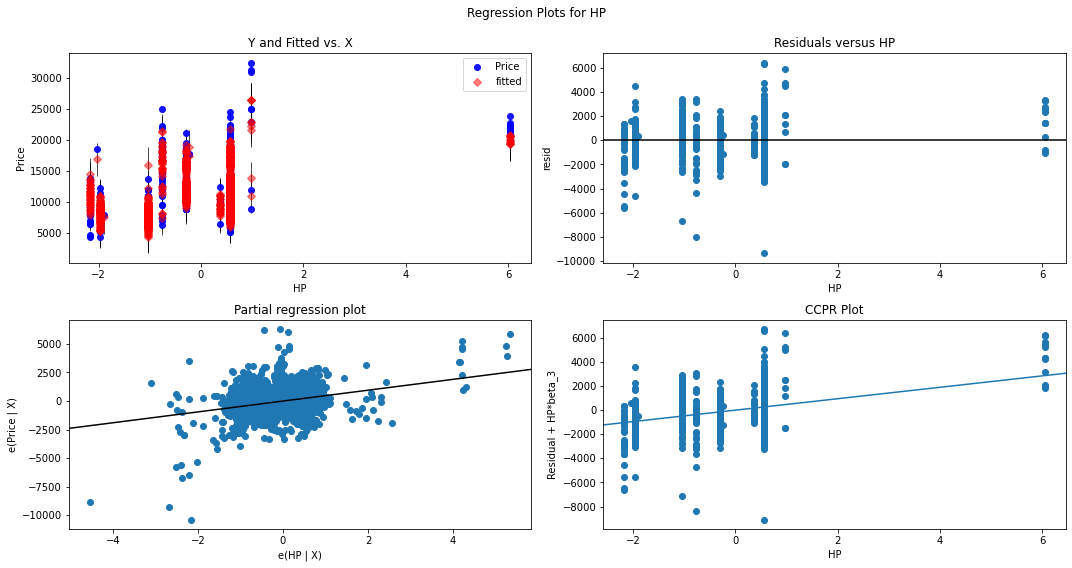

cc


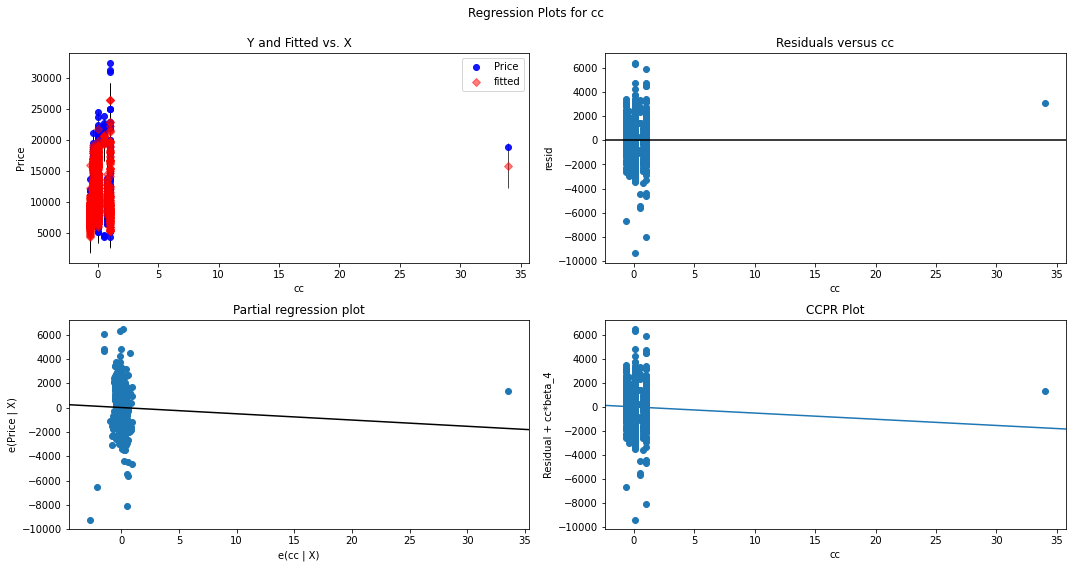

Doors


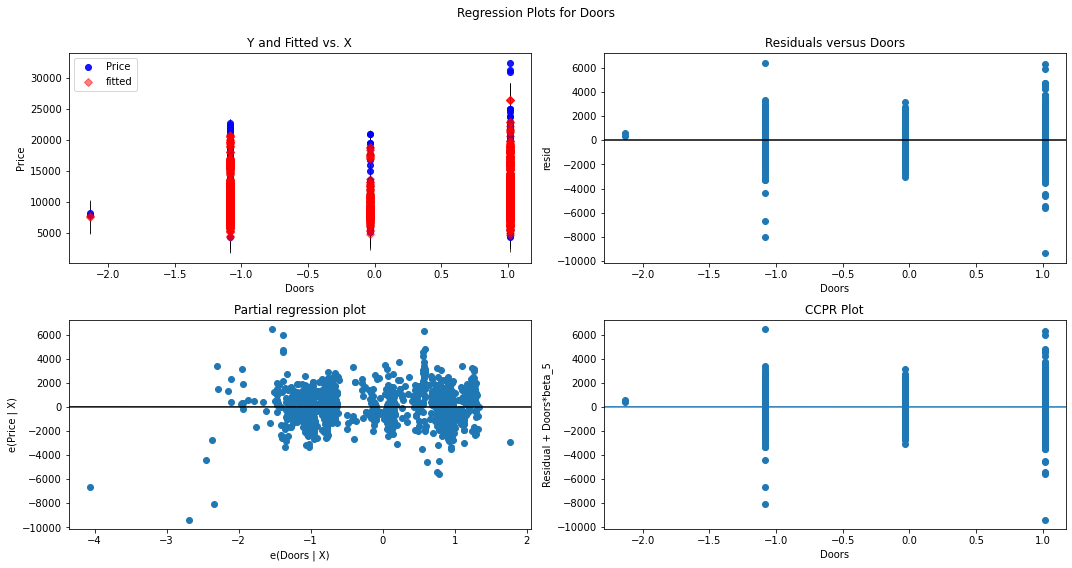

Gears


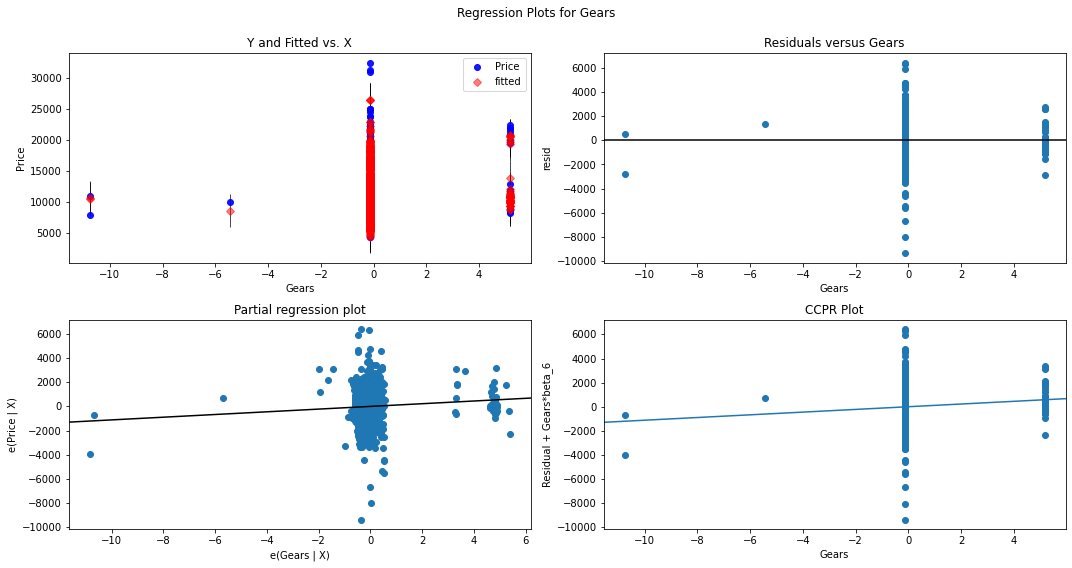

Quarterly_Tax


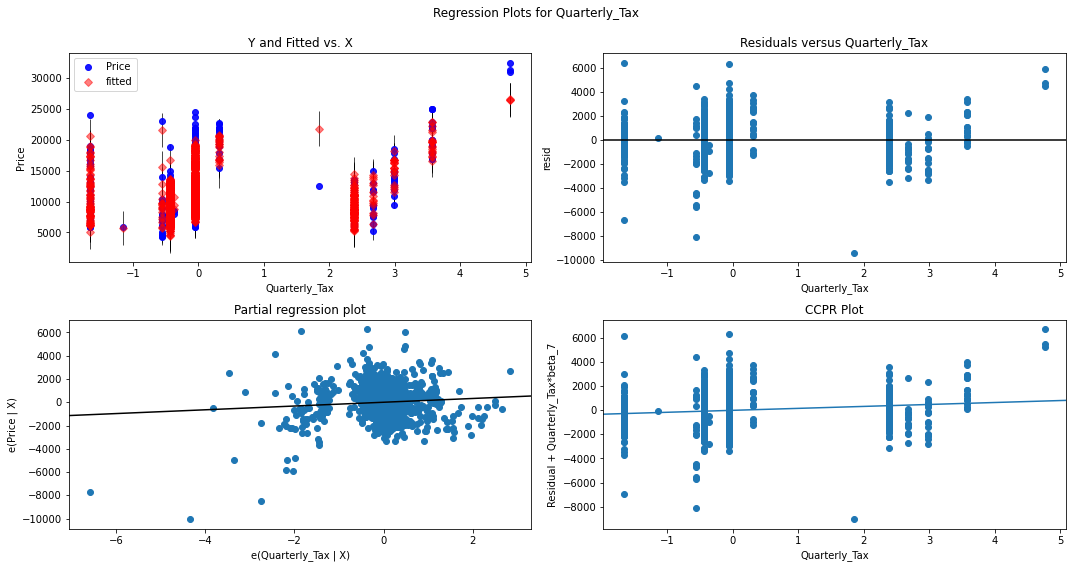

Weight


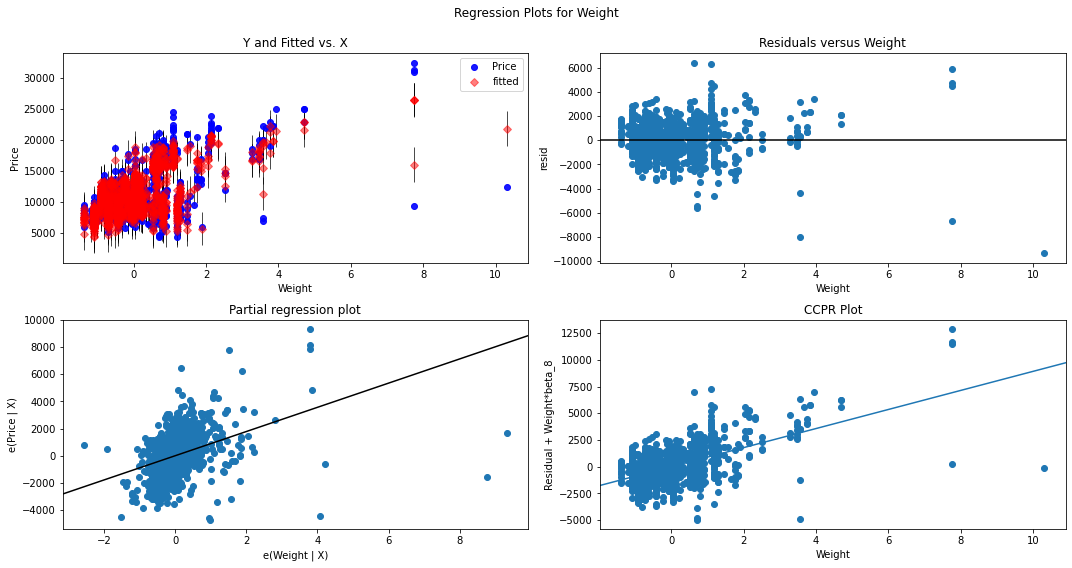

In [59]:
graphics=['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']
for i in graphics:
    print(i)
    fig=plt.figure(figsize=(15,8))
    fig=sm.graphics.plot_regress_exog(modelqq,i,fig=fig)
    plt.show()

detecting influencers/outlliers

cook's distance

In [61]:
model_influencce = modelqq.get_influence()
c,_ = model_influencce.cooks_distance

<StemContainer object of 3 artists>

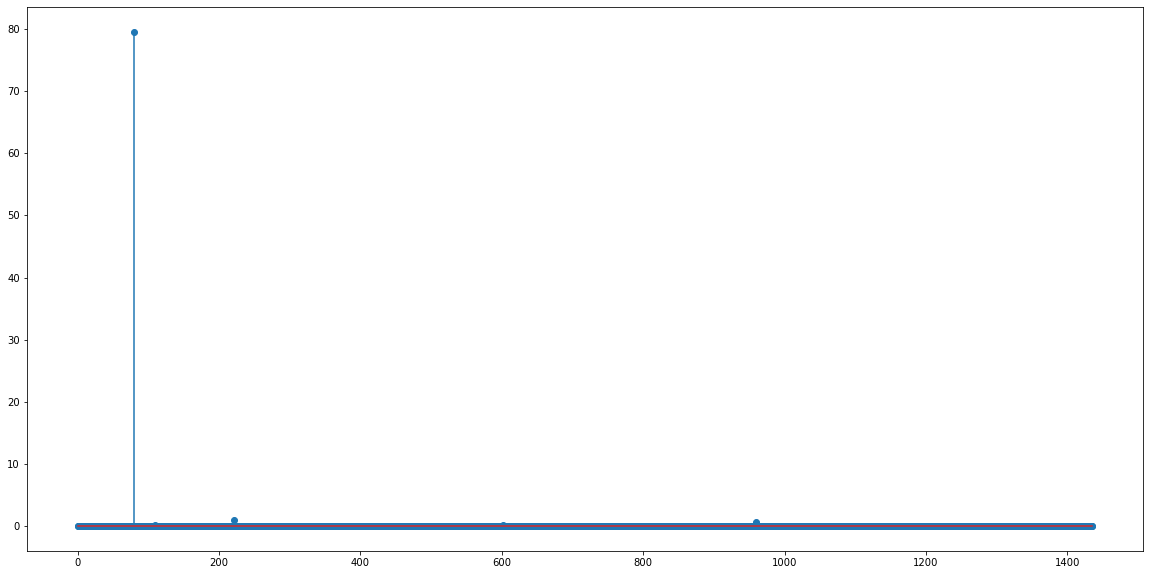

In [65]:
fig_cook = plt.figure(figsize=(20,10))
plt.stem(np.arange(len(corolla)),np.round(c,3))

In [69]:
np.argmax(c),np.max(c)

(80, 79.5201062411893)

the cook's distance clearly shows that the point 80 is an outlier

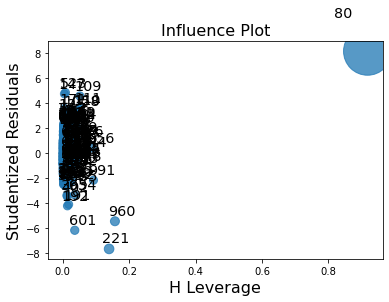

In [71]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(modelqq)
plt.show()

Model optimization

In [105]:
corolla_new = corolla

In [84]:
corolla_new.drop(corolla_new.index[80],inplace=True)

In [106]:
corolla_new.drop(corolla_new.index[960],inplace=True)

In [107]:
corolla_new.drop(corolla_new.index[221],inplace=True)

In [108]:
corolla_new.drop(corolla_new.index[601],inplace=True)

In [109]:
corolla_new.reset_index(inplace=True)

In [110]:
corolla_new.drop(labels='index',axis=1)

,level_0,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1426,1429,7500,69,20544,86,1300,3,5,69,1025
1427,1430,10845,72,19000,86,1300,3,5,69,1015
1428,1431,8500,71,17016,86,1300,3,5,69,1015
1429,1432,7250,70,16916,86,1300,3,5,69,1015


final model

In [111]:
model_final = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=corolla_new).fit()

In [112]:
model_final.aic

24617.75610542466

In [113]:
model_final.rsquared

0.8693302951509227

In [114]:
model_final_dr = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=corolla_new).fit()

In [115]:
model_final_dr.aic

24616.195994357044

In [116]:
model_final_dr.rsquared

0.8692901211519314

Inference:

The final model is bulit after dropping the outlier

since,feature door doen't contribute more towards the result, the model built after dropping door performs better than considering all feature (aic value decreases)